In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
pd.set_option('display.max_columns', None)


In [97]:
df = pd.read_csv("bank.csv")
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

## One Hot Encode and Prepare the data

In [98]:
X = df.drop('deposit', axis=1)  # Drop the target variable to get the features
y = df['deposit']  # Select only the target variable

# Display the original DataFrame
# print("Original DataFrame:")
# print(df.head())
display(X.columns)
display(X.head())



# Perform one-hot encoding on the features
X = pd.get_dummies(X, dtype=int)
X = X.drop('campaign', axis=1)

# uncomment this code if you want to try encoding with the campaign
# # campaign is a categorical variable, so we need to perform one-hot encoding on it
# campaign = pd.get_dummies(X.campaign, prefix='campaign', dtype=int)
# dropped = X.drop('campaign', axis=1)

# # combine the one-hot encoded campaign with the original features
# X = pd.concat([dropped, campaign], axis=1)



continuous_features = X[['age','balance', 'day', 'duration', 'pdays']]

for column in continuous_features:
    X[column] = (X[column] - X[column].mean()) / X[column].std()

X.head()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


,age,balance,day,duration,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491438,0.252514,-1.265689,1.930139,-0.481162,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.239620,-0.459953,-1.265689,3.154470,-0.481162,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,-0.019470,-0.080157,-1.265689,2.929770,-0.481162,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1.155681,0.293749,-1.265689,0.596339,-0.481162,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1.071742,-0.416858,-1.265689,0.867132,-0.481162,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


Model 1

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

mlp = MLPClassifier(hidden_layer_sizes=(10),max_iter=500) # 1 layer, 5 nodes

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1483
           1       0.82      0.86      0.84      1308

    accuracy                           0.85      2791
   macro avg       0.85      0.85      0.85      2791
weighted avg       0.85      0.85      0.85      2791



In [101]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))


This dataset has 50 input nodes and 2 output node(s)
There are 2 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 50x10 (50 nodes feeding into a layer of 10 nodes)
  1: 10x1 (10 nodes feeding into a layer of 1 nodes)

There are 2 1D arrays of intercepts, one for each layer
Each layer has [10, 1] intercepts, one for each node


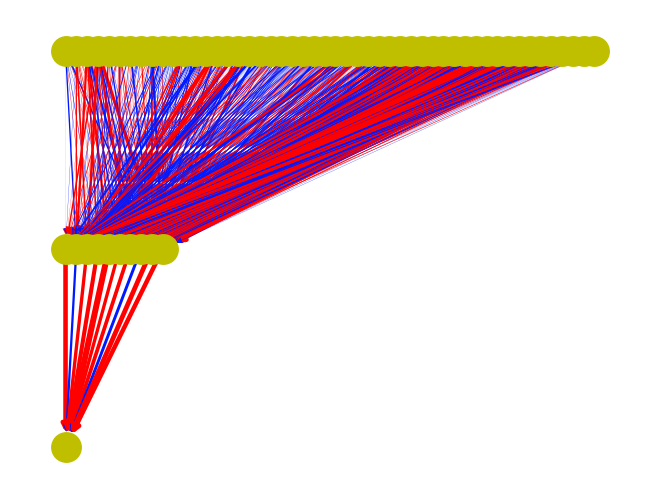

In [102]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)

Model 2

In [103]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10),max_iter=500) # 1 layer, 5 nodes

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1483
           1       0.81      0.88      0.84      1308

    accuracy                           0.85      2791
   macro avg       0.85      0.85      0.85      2791
weighted avg       0.85      0.85      0.85      2791



In [104]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))

This dataset has 50 input nodes and 2 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 50x10 (50 nodes feeding into a layer of 10 nodes)
  1: 10x10 (10 nodes feeding into a layer of 10 nodes)
  2: 10x1 (10 nodes feeding into a layer of 1 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [10, 10, 1] intercepts, one for each node


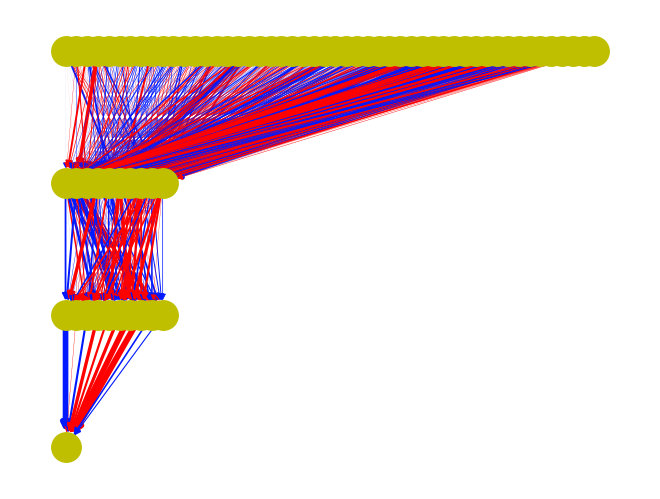

In [105]:
show_ann(mlp)

Model 3

In [106]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 5),max_iter=500) # 1 layer, 5 nodes

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1483
           1       0.81      0.87      0.84      1308

    accuracy                           0.84      2791
   macro avg       0.84      0.84      0.84      2791
weighted avg       0.84      0.84      0.84      2791



In [107]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))

This dataset has 50 input nodes and 2 output node(s)
There are 4 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 50x20 (50 nodes feeding into a layer of 20 nodes)
  1: 20x10 (20 nodes feeding into a layer of 10 nodes)
  2: 10x5 (10 nodes feeding into a layer of 5 nodes)
  3: 5x1 (5 nodes feeding into a layer of 1 nodes)

There are 4 1D arrays of intercepts, one for each layer
Each layer has [20, 10, 5, 1] intercepts, one for each node


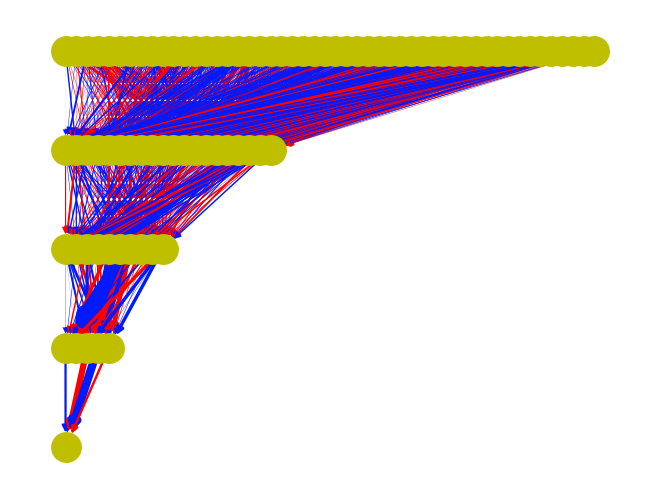

In [108]:
show_ann(mlp)